In [31]:
import tensorflow as tf
import ssl
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.reuters.load_data(num_words=10000)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of d6586e694ee56d7a4e65172e12b3e987c03096cb01eab99753921ef915959916 so we will re-download the data.
2113536/2110848 [==============================] - 21s 10us/step


In [27]:
print(len(train_data))
print(len(test_data))

8982
2246


In [28]:
def decode(data):
    word_index = tf.keras.datasets.reuters.get_word_index()
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    news = ' '.join([reversed_word_index.get(index - 3, '?') for index in data])
    return news

In [29]:
print(train_data[0])
decode(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [30]:
decode(train_data[12])

'? ? corp said it reached an agreement in principal covering the acquisition of the company by privately held ? financial corp the agreement calls for ? to make a self tender offer for all of its outstanding stock at a price of 22 dlrs per share in cash ? headquartered in los angeles develops manages and ? real estate ? also said reuter 3'

In [56]:
def vectorize_sequences(sequences, dimension=10000):
    matrix = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        matrix[i, sequence] = 1
    return matrix

vector_train = vectorize_sequences(train_data)
vector_test = vectorize_sequences(test_data)
print(vector_train[0])
print(test_label)

[0. 1. 1. ... 0. 0. 0.]
[ 3 10  1 ...  3  3 24]


In [50]:
one_hot_train_labels = tf.keras.utils.to_categorical(train_label)
print(one_hot_train_labels[0])
one_hot_test_labels = tf.keras.utils.to_categorical(test_label)
print(type(one_hot_test_labels))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>


In [116]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000, )))
# 中间层最好比输出层大，否则向量丢失特征
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 当结果是输出多个分类的概率时，用softmax激活函数，它将为46个分类提供不同的可能性概率值
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
val_data = vectorize_sequences(test_data)
val_label = tf.keras.utils.to_categorical(test_label)

fit_data = vectorize_sequences(train_data)
fit_label = tf.keras.utils.to_categorical(train_label)

In [118]:
history = model.fit(fit_data, fit_label, epochs=20, batch_size=1300, validation_data=(val_data, val_label))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 2s 208us/sample - loss: 3.1680 - accuracy: 0.4177 - val_loss: 2.3245 - val_accuracy: 0.5690
Epoch 2/20
8982/8982 [==============================] - 1s 135us/sample - loss: 1.9360 - accuracy: 0.6200 - val_loss: 1.7025 - val_accuracy: 0.6411
Epoch 3/20
8982/8982 [==============================] - 1s 100us/sample - loss: 1.4473 - accuracy: 0.6983 - val_loss: 1.4441 - val_accuracy: 0.6915
Epoch 4/20
8982/8982 [==============================] - 1s 94us/sample - loss: 1.1827 - accuracy: 0.7463 - val_loss: 1.3092 - val_accuracy: 0.7133
Epoch 5/20
8982/8982 [==============================] - 1s 95us/sample - loss: 1.0163 - accuracy: 0.7880 - val_loss: 1.2140 - val_accuracy: 0.7351
Epoch 6/20
8982/8982 [==============================] - 1s 94us/sample - loss: 0.8740 - accuracy: 0.8161 - val_loss: 1.1400 - val_accuracy: 0.7524
Epoch 7/20
8982/8982 [==============================] - 1s 95us/sam

In [119]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

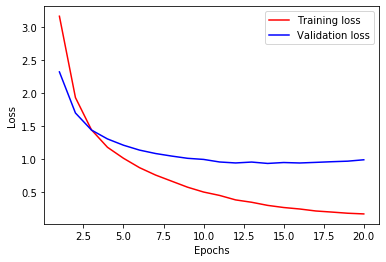

In [120]:
import matplotlib.pyplot as plt
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 3s 283us/sample - loss: 2.8947 - accuracy: 0.4939 - val_loss: 1.9625 - val_accuracy: 0.6394
Epoch 2/20
8982/8982 [==============================] - 1s 151us/sample - loss: 1.5641 - accuracy: 0.6883 - val_loss: 1.4520 - val_accuracy: 0.6848
Epoch 3/20
8982/8982 [==============================] - 1s 128us/sample - loss: 1.1383 - accuracy: 0.7590 - val_loss: 1.2756 - val_accuracy: 0.7199
Epoch 4/20
8982/8982 [==============================] - 1s 128us/sample - loss: 0.9039 - accuracy: 0.8115 - val_loss: 1.1546 - val_accuracy: 0.7409
Epoch 5/20
8982/8982 [==============================] - 1s 126us/sample - loss: 0.7373 - accuracy: 0.8473 - val_loss: 1.0638 - val_accuracy: 0.7707
Epoch 6/20
8982/8982 [==============================] - 1s 127us/sample - loss: 0.6048 - accuracy: 0.8775 - val_loss: 1.0338 - val_accuracy: 0.7743
Epoch 7/20
8982/8982 [==============================] - 1s 128us

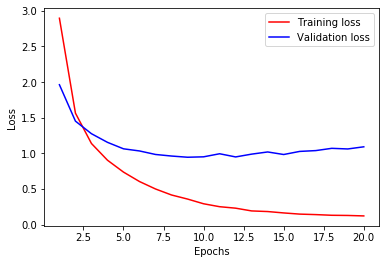

In [140]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 当结果是输出多个分类的概率时，用softmax激活函数，它将为46个分类提供不同的可能性概率值
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

val_data = vectorize_sequences(test_data)
val_label = tf.keras.utils.to_categorical(test_label)

fit_data = vectorize_sequences(train_data)
fit_label = tf.keras.utils.to_categorical(train_label)

history = model.fit(fit_data, fit_label, epochs=20, batch_size=1200, validation_data=(val_data, val_label))

import matplotlib.pyplot as plt
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [141]:
results = model.evaluate(val_data, val_label)
print(results)

2246/2246 [==============================] - 0s 124us/sample - loss: 1.0919 - accuracy: 0.7885
[1.0919483300308404, 0.7885129]


In [142]:
predictions = model.predict(val_data)
index = 1233
print(predictions[index])
print(np.around(predictions[index]))
print(np.sum(predictions[index]))
print(np.argmax(predictions[index]))
print(val_label[index])

[1.37143041e-04 1.47302961e-03 8.65329857e-05 1.13496473e-02
 9.75960076e-01 1.44334670e-04 1.89176193e-04 4.09994798e-04
 1.49397785e-03 1.08415748e-04 6.39654463e-04 1.85595054e-04
 7.49624041e-06 2.82586319e-04 2.32536724e-04 3.66492131e-05
 2.23687594e-03 8.32241494e-05 7.35242502e-05 9.73310904e-04
 1.54540990e-03 4.96409848e-05 1.34030470e-05 2.59631517e-04
 4.05810642e-05 6.07223010e-05 1.56046844e-05 7.46616424e-05
 7.26813159e-05 2.66720657e-04 6.40792859e-05 2.81679422e-05
 1.06004132e-04 1.03839579e-04 3.95835850e-05 5.97609942e-05
 1.15085277e-04 6.33253730e-05 1.27939798e-04 1.72853936e-04
 4.86399076e-05 1.03580445e-04 3.66903041e-05 3.39956605e-05
 5.92158267e-06 3.87950073e-04]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0000004
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
